In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.metrics import r2_score, classification_report, roc_curve, auc, confusion_matrix, precision_recall_curve, mean_absolute_error
from sklearn.preprocessing import label_binarize

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

def plot_confusion_matrix(
    working_dir, cm, target_names, title="Confusion matrix", cmap=None, normalize=False
):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap("Blues")

    plt.figure(figsize=(9, 8))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(
                j,
                i,
                f"{cm[i, j]:0.4f}",
                horizontalalignment="center",
                color="black",
                # color="white" if cm[i, j] > thresh else "black",
            )
        else:
            plt.text(
                j,
                i,
                f"{cm[i, j]:,}",
                horizontalalignment="center",
                color="black",
                # color="white" if cm[i, j] > thresh else "black",
            )

    plt.ylabel("True label")
    plt.xlabel(f"Predicted label\naccuracy={accuracy:0.4f}; misclass={misclass:0.4f}")

    #plt.savefig(os.path.join(working_dir, title + ".pdf"))
    #plt.savefig(os.path.join(working_dir, title + ".png"))
    #plt.clf()


def print_classification_report(y_true, y_pred):
    """
    Prints classification report to stdout.

    Args:
        y_true (nparray): 1D npy array containing int values for class
        y_pred (nparray): 1D npy array containing int values for predicted class
        train_gen (Keras Generator): Training generator used for model training, used for labels
    """
    print("Classification Report")
    print(classification_report(y_true, y_pred))



In [3]:
df = pd.read_csv("sf_res.csv")
df.loc[df["sweep"] != "neut", "sweep"] = "sweep"
df.head()


,rep,sweep,pos,clr,pred
0,0,neut,2.502531e+06,0.395412,neut
1,1,neut,2.502796e+06,0.425277,neut
2,10,neut,2.502128e+06,0.942135,neut
3,100,neut,2.501515e+06,1.233948,neut
4,1000,neut,2.502209e+06,0.137618,neut


Classification Report
              precision    recall  f1-score   support

        neut       0.36      0.95      0.52      5001
       sweep       0.85      0.15      0.25     10001

    accuracy                           0.42     15002
   macro avg       0.60      0.55      0.39     15002
weighted avg       0.69      0.42      0.34     15002



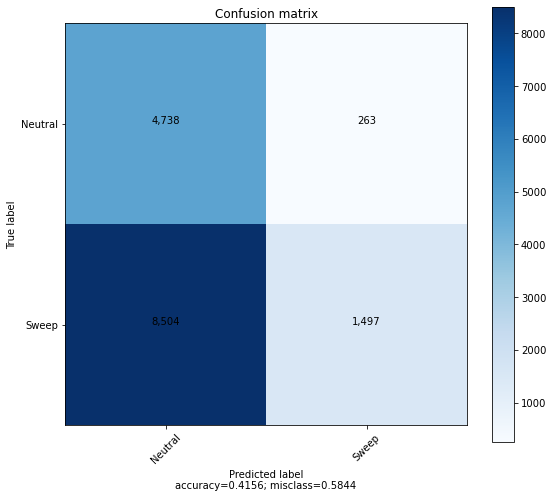

In [4]:
print_classification_report(df["sweep"], df["pred"])
plot_confusion_matrix('.', confusion_matrix(df["sweep"], df["pred"]), ["Neutral", "Sweep"])


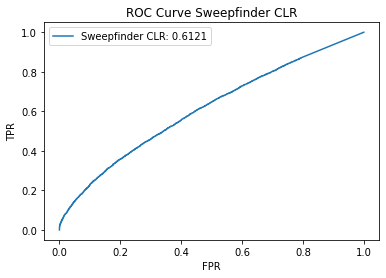

In [5]:
"""Plot ROC curve by binarizing neutral/sweep."""

# Plot sdn/ssv distinction
swp_fpr, swp_tpr, thresh = roc_curve(df["sweep"], df["clr"], pos_label="sweep")
swp_auc_val = auc(swp_fpr, swp_tpr)
plt.plot(
    swp_fpr,
    swp_tpr,
    label=f"Sweepfinder CLR: {swp_auc_val:.4}",
)

plt.title(f"ROC Curve Sweepfinder CLR")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

plt.show()

Text(0, 0.5, 'Precision')

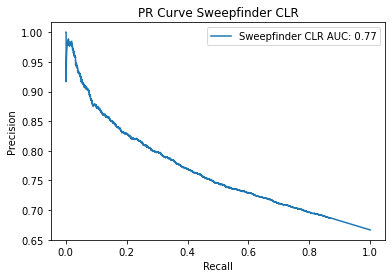

In [6]:
"""Plot PR curve by binarizing neutral/sweep."""

# Plot PR Curve for binarized labs
prec, rec, thresh = precision_recall_curve(df["sweep"], df["clr"], pos_label="sweep")
auc_val = auc(rec, prec)
plt.plot(rec, prec, label=f"Sweepfinder CLR AUC: {auc_val:.2}")

plt.title(f"PR Curve Sweepfinder CLR")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")

In [7]:
df[df["sweep"] == "ssv"].describe()

,rep,pos,clr
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN
